In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("/kaggle/input/america-dengue-data/dengue data 17-07-2025.csv")
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14-05-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,28-05-2010,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,04-06-2010,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,11-06-2010,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,18-06-2010,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


🔧 Cell 1 — Install dependencies

In [3]:
!pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip -q install transformers peft accelerate==0.34.2 pandas scikit-learn matplotlib tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 77.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 105.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 31.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

📥 Cell 2 — Imports & device

In [3]:
import os, math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from transformers import GPT2Config, GPT2Model

from peft import LoraConfig, get_peft_model, TaskType

warnings.filterwarnings("ignore")
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE


2025-09-01 09:33:59.758219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756719240.000567      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756719240.077333      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'cuda'

📥 Cell 3 — Load & clean data (both cities together)

In [9]:
# Upload or point to your dataset
CSV_PATH = "/kaggle/input/america-dengue-data/dengue data 17-07-2025.csv"  # replace or upload
df = pd.read_csv(CSV_PATH)

# Normalize column names
df.columns = [c.strip().lower() for c in df.columns]

# Parse dates
df['week_start_date'] = pd.to_datetime(df['week_start_date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['week_start_date'])

# Sort
df = df.sort_values(['city','week_start_date']).reset_index(drop=True)

# Features vs target
target_col = 'total_cases'
feature_cols = [c for c in df.columns if c not in ['city','week_start_date',target_col]]

# Fill missing values + remove outliers city-wise
def clean_city(g):
    g = g.copy()
    # Fill missing
    g[feature_cols] = g[feature_cols].ffill().bfill()
    g[target_col] = g[target_col].interpolate(limit_direction='both')
    g = g.dropna()

    # --- Outlier removal using IQR on target ---
    q1 = g[target_col].quantile(0.25)
    q3 = g[target_col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    g = g[(g[target_col] >= lower) & (g[target_col] <= upper)]

    return g

df = df.groupby('city', group_keys=False).apply(clean_city).reset_index(drop=True)

print(df.city.value_counts())
df.head()


city
sj    862
iq    476
Name: count, dtype: int64


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
1,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
3,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
4,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


🧪 Cell 4 — Train/test split (per city, then merged)

In [10]:
# Time-based split: last 20% of each city reserved for test
def temporal_split(g, frac=0.2):
    n = len(g)
    n_test = int(max(1, round(n*frac)))
    return g.iloc[:-n_test], g.iloc[-n_test:]

train_parts, test_parts = [], []
for city, g in df.groupby('city'):
    tr, te = temporal_split(g, 0.2)
    train_parts.append(tr)
    test_parts.append(te)

train_df = pd.concat(train_parts).reset_index(drop=True)
test_df  = pd.concat(test_parts).reset_index(drop=True)

print("Train shape:", train_df.shape, "Test shape:", test_df.shape)


Train shape: (1071, 25) Test shape: (267, 25)


🧱 Cell 5 — Dataset (patching + city embedding)

In [11]:
LOOKBACK = 24
HORIZON = 4
PATCH_LEN = 4
PATCH_STRIDE = 2
BATCH_SIZE = 64

# temporal encodings
def add_time_enc(g):
    g = g.copy()
    w = (g['weekofyear'] % 53).astype(float).values
    g['wofy_sin'] = np.sin(2*np.pi*w/53)
    g['wofy_cos'] = np.cos(2*np.pi*w/53)
    return g

# map city to integer
city2id = {c:i for i,c in enumerate(df['city'].unique())}

class TSForecastDS(Dataset):
    def __init__(self, df_city, scaler=None, fit_scaler=False):
        g = add_time_enc(df_city)
        self.features = [c for c in feature_cols if c not in ['year','weekofyear']] + ['wofy_sin','wofy_cos']
        X = g[self.features].values.astype(np.float32)
        y = g[target_col].values.astype(np.float32)
        city_ids = g['city'].map(city2id).values.astype(np.int64)

        if scaler is None:
            scaler = StandardScaler()
        if fit_scaler:
            X = scaler.fit_transform(X)
        else:
            X = scaler.transform(X)

        self.scaler = scaler
        self.g = g.reset_index(drop=True)
        self.X = X
        self.y = y
        self.city_ids = city_ids

        self.indices = []
        N = len(g)
        for t in range(LOOKBACK, N - HORIZON + 1):
            self.indices.append(t)

    def __len__(self):
        return len(self.indices)

    def _make_patches(self, hist):
        patches = []
        for start in range(0, LOOKBACK - PATCH_LEN + 1, PATCH_STRIDE):
            end = start + PATCH_LEN
            patch = hist[start:end].reshape(-1)
            patches.append(patch)
        return np.stack(patches, axis=0)

    def __getitem__(self, idx):
        t = self.indices[idx]
        hist_X = self.X[t-LOOKBACK:t]
        target = self.y[t:t+HORIZON]
        patches = self._make_patches(hist_X)
        city_id = self.city_ids[t]
        return {
            "tokens": torch.from_numpy(patches),
            "target": torch.from_numpy(target),
            "city_id": torch.tensor(city_id)
        }

def collate(batch):
    tokens = nn.utils.rnn.pad_sequence([b["tokens"] for b in batch], batch_first=True)
    target = torch.stack([b["target"] for b in batch])
    city_id = torch.stack([b["city_id"] for b in batch])
    return tokens, target, city_id







🧠 Cell 6 — Model (with city embedding)

In [12]:
class NumericPatchEmbed(nn.Module):
    def __init__(self, patch_dim, d_model):
        super().__init__()
        self.proj = nn.Linear(patch_dim, d_model)

    def forward(self, x):
        return self.proj(x)

class LLM4TSMultiCity(nn.Module):
    def __init__(self, patch_dim, num_cities, d_model=256, n_layer=6, n_head=8, horizon=HORIZON):
        super().__init__()
        self.embed = NumericPatchEmbed(patch_dim, d_model)
        self.city_emb = nn.Embedding(num_cities, d_model)

        cfg = GPT2Config(
            n_embd=d_model,
            n_layer=n_layer,
            n_head=n_head,
            n_positions=1024,
            n_ctx=1024,
            vocab_size=1
        )
        self.backbone = GPT2Model(cfg)
        lora_cfg = LoraConfig(
            task_type=TaskType.FEATURE_EXTRACTION,
            r=16, lora_alpha=16, lora_dropout=0.05,
            target_modules=["c_attn"]
        )
        self.backbone = get_peft_model(self.backbone, lora_cfg)

        self.reg_head = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, d_model//2),
            nn.GELU(),
            nn.Linear(d_model//2, horizon)
        )

    def forward(self, tokens, city_id):
        x = self.embed(tokens)  # [B,P,D]
        city_vec = self.city_emb(city_id)[:,None,:]  # [B,1,D]
        x = torch.cat([city_vec, x], dim=1)  # prepend city token
        out = self.backbone(inputs_embeds=x).last_hidden_state
        pooled = out[:, -1, :]
        pred = self.reg_head(pooled)
        return pred


🏋️ Cell 7 — Training & evaluation

In [5]:
# def rmse(y_true, y_pred):
#     return math.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred, eps=1e-6):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true-y_pred)/np.clip(np.abs(y_true), eps, None)))*100

# # Build datasets
# scaler = StandardScaler().fit(train_df[[c for c in feature_cols if c not in ['year','weekofyear']] + ['wofy_sin','wofy_cos']])
# train_ds = TSForecastDS(train_df, scaler, fit_scaler=False)
# test_ds  = TSForecastDS(pd.concat([train_df,test_df], ignore_index=True), scaler, fit_scaler=False)

# train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate, drop_last=True)
# test_loader  = DataLoader(test_ds, batch_size=128, shuffle=False, collate_fn=collate)

# # Model init
# sample = train_ds[0]["tokens"]
# P, Dpatch = sample.shape
# model = LLM4TSMultiCity(patch_dim=Dpatch, num_cities=len(city2id)).to(DEVICE)

# # Freeze backbone except LoRA
# for n,p in model.backbone.named_parameters():
#     if "lora_" not in n:
#         p.requires_grad_(False)

# opt = torch.optim.AdamW(filter(lambda p:p.requires_grad, model.parameters()), lr=3e-4)
# best_loss, best_state = float("inf"), None

# # Training loop
# for epoch in range(30):
#     model.train()
#     losses=[]
#     for tokens, target, city_id in train_loader:
#         tokens,tgt,city_id = tokens.to(DEVICE).float(), target.to(DEVICE).float(), city_id.to(DEVICE)
#         pred = model(tokens, city_id)
#         loss = nn.functional.l1_loss(pred, tgt) + 0.2*nn.functional.mse_loss(pred, tgt)
#         opt.zero_grad(); loss.backward()
#         nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#         opt.step()
#         losses.append(loss.item())
#     eloss=np.mean(losses)
#     print(f"Epoch {epoch+1}: loss={eloss:.4f}")
#     if eloss<best_loss:
#         best_loss, best_state=eloss,{k:v.cpu() for k,v in model.state_dict().items()}
# if best_state: model.load_state_dict(best_state)


In [13]:
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred, eps=1e-6):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/np.clip(np.abs(y_true), eps, None)))*100

# --- FIX: add temporal encodings before scaling ---
train_df = add_time_enc(train_df)
test_df  = add_time_enc(test_df)

# Build datasets
scaler = StandardScaler().fit(
    train_df[[c for c in feature_cols if c not in ['year','weekofyear']] + ['wofy_sin','wofy_cos']]
)
train_ds = TSForecastDS(train_df, scaler, fit_scaler=False)
test_ds  = TSForecastDS(pd.concat([train_df, test_df], ignore_index=True), scaler, fit_scaler=False)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate, drop_last=True)
test_loader  = DataLoader(test_ds, batch_size=128, shuffle=False, collate_fn=collate)

# Model init
sample = train_ds[0]["tokens"]
P, Dpatch = sample.shape
model = LLM4TSMultiCity(patch_dim=Dpatch, num_cities=len(city2id)).to(DEVICE)

# Freeze backbone except LoRA
for n, p in model.backbone.named_parameters():
    if "lora_" not in n:
        p.requires_grad_(False)

opt = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=3e-4)
best_loss, best_state = float("inf"), None

# Training loop
for epoch in range(100):
    model.train()
    losses = []
    for tokens, target, city_id in train_loader:
        tokens, tgt, city_id = tokens.to(DEVICE).float(), target.to(DEVICE).float(), city_id.to(DEVICE)
        pred = model(tokens, city_id)
        loss = nn.functional.l1_loss(pred, tgt) + 0.2*nn.functional.mse_loss(pred, tgt)
        opt.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        opt.step()
        losses.append(loss.item())
    eloss = np.mean(losses)
    print(f"Epoch {epoch+1}: loss={eloss:.4f}")
    if eloss < best_loss:
        best_loss, best_state = eloss, {k: v.cpu() for k, v in model.state_dict().items()}

if best_state:
    model.load_state_dict(best_state)


Epoch 1: loss=140.6615
Epoch 2: loss=130.7931
Epoch 3: loss=117.3895
Epoch 4: loss=99.8130
Epoch 5: loss=78.5561
Epoch 6: loss=65.3237
Epoch 7: loss=57.0398
Epoch 8: loss=50.9212
Epoch 9: loss=45.5769
Epoch 10: loss=41.2852
Epoch 11: loss=39.0480
Epoch 12: loss=37.0972
Epoch 13: loss=34.3975
Epoch 14: loss=32.7013
Epoch 15: loss=31.7547
Epoch 16: loss=31.1259
Epoch 17: loss=29.6918
Epoch 18: loss=28.7730
Epoch 19: loss=28.9112
Epoch 20: loss=28.2596
Epoch 21: loss=27.0528
Epoch 22: loss=27.1406
Epoch 23: loss=26.3525
Epoch 24: loss=26.0189
Epoch 25: loss=25.1628
Epoch 26: loss=24.9199
Epoch 27: loss=24.1478
Epoch 28: loss=24.3647
Epoch 29: loss=23.5640
Epoch 30: loss=22.9777
Epoch 31: loss=22.6634
Epoch 32: loss=22.3035
Epoch 33: loss=22.3161
Epoch 34: loss=21.6613
Epoch 35: loss=20.9384
Epoch 36: loss=20.9513
Epoch 37: loss=20.6972
Epoch 38: loss=20.3349
Epoch 39: loss=20.8287
Epoch 40: loss=19.9440
Epoch 41: loss=18.9438
Epoch 42: loss=18.6707
Epoch 43: loss=18.7043
Epoch 44: loss=18

📊 Cell 8 — Forecasting & metrics (per city and overall)

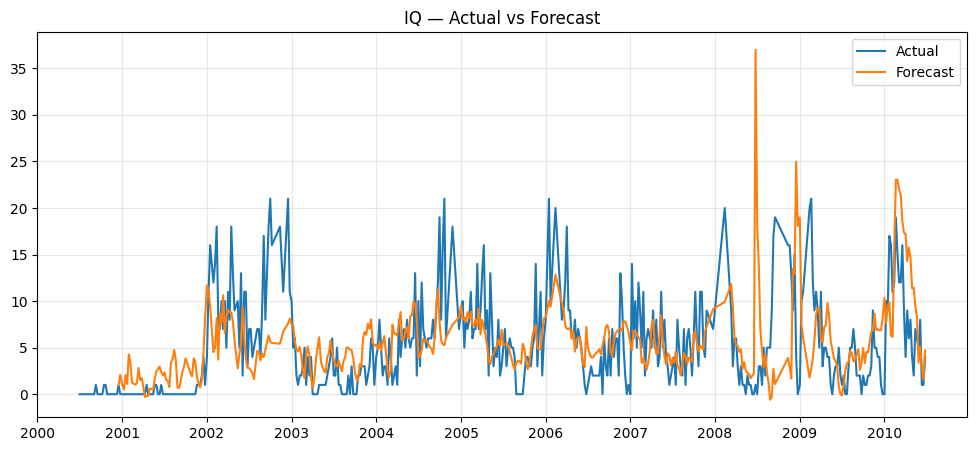

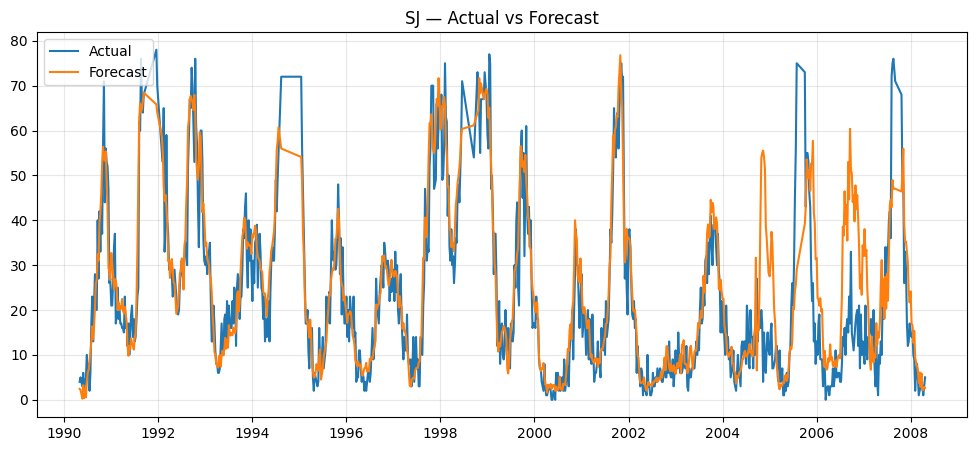

=== Metrics per city ===
iq {'RMSE': 8.198187242636916, 'MAE': 5.771488855622317, 'MAPE(%)': 72637003.43532324}
sj {'RMSE': 17.24150430099716, 'MAE': 12.699829730876656, 'MAPE(%)': 4492000.091634293}

=== Overall Metrics ===
{'RMSE': 14.676961611489446, 'MAE': 10.234689719082041, 'MAPE(%)': 28738349.595943093}


In [14]:
# Get predictions
model.eval()
preds=[]
with torch.no_grad():
    for tokens, _, city_id in test_loader:
        tokens,city_id=tokens.to(DEVICE).float(), city_id.to(DEVICE)
        out=model(tokens,city_id).cpu().numpy()
        preds.append(out)
preds=np.concatenate(preds,axis=0)

# Align predictions with timeline
g_all=pd.concat([train_df,test_df],ignore_index=True).reset_index(drop=True)
start_idx=list(range(LOOKBACK,len(g_all)-HORIZON+1))
stitched=np.full(len(g_all),np.nan,dtype=np.float32)
for i,t in enumerate(start_idx):
    for h in range(HORIZON):
        stitched[t+h]=preds[i,h]

results={}
for city in df.city.unique():
    mask=(g_all['city']==city)&(g_all.index>=len(train_df))
    y_true=g_all.loc[mask,target_col].values
    y_pred=stitched[mask.index[mask]]
    valid=~np.isnan(y_pred)
    y_true,y_pred=y_true[valid],y_pred[valid]
    metrics={"RMSE":rmse(y_true,y_pred),
             "MAE":mean_absolute_error(y_true,y_pred),
             "MAPE(%)":mape(y_true,y_pred)}
    results[city]=metrics

    plt.figure(figsize=(12,5))
    plt.title(f"{city.upper()} — Actual vs Forecast")
    plt.plot(g_all.loc[g_all['city']==city,'week_start_date'],
             g_all.loc[g_all['city']==city,target_col],label="Actual")
    plt.plot(g_all.loc[g_all['city']==city,'week_start_date'],
             stitched[g_all['city']==city],label="Forecast")
    plt.legend(); plt.grid(True,alpha=0.3); plt.show()

print("=== Metrics per city ===")
for c,m in results.items(): print(c,m)

# Overall
mask=g_all.index>=len(train_df)
valid=~np.isnan(stitched[mask])
overall_true=g_all.loc[mask,target_col].values[valid]
overall_pred=stitched[mask][valid]
print("\n=== Overall Metrics ===")
print({"RMSE":rmse(overall_true,overall_pred),
       "MAE":mean_absolute_error(overall_true,overall_pred),
       "MAPE(%)":mape(overall_true,overall_pred)})


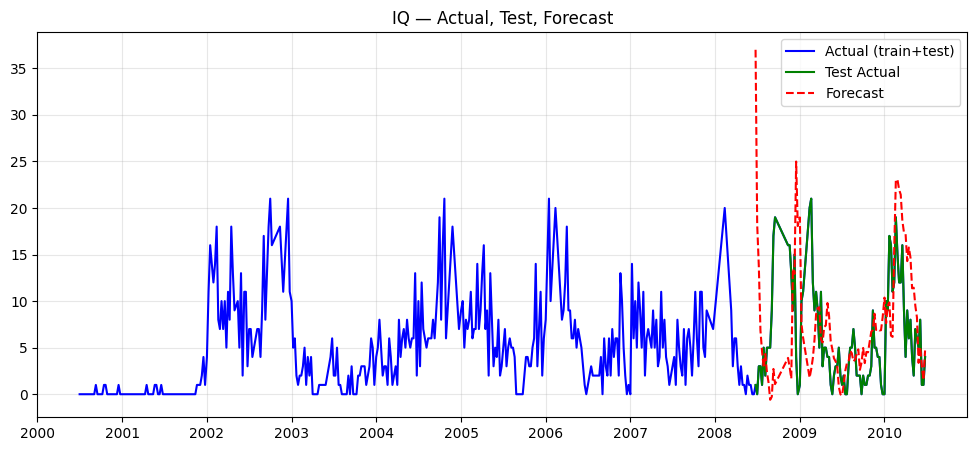

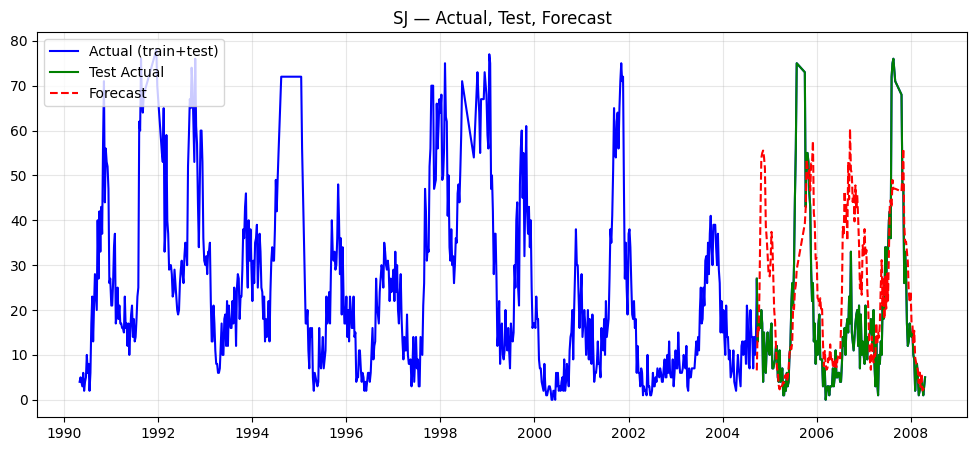

=== Metrics per city ===
iq {'RMSE': 8.198187242636916, 'MAE': 5.771488855622317, 'MAPE(%)': 72637003.43532324}
sj {'RMSE': 17.24150430099716, 'MAE': 12.699829730876656, 'MAPE(%)': 4492000.091634293}

=== Overall Metrics ===
{'RMSE': 14.676961611489446, 'MAE': 10.234689719082041, 'MAPE(%)': 28738349.595943093}


In [15]:
# Get predictions
model.eval()
preds=[]
with torch.no_grad():
    for tokens, _, city_id in test_loader:
        tokens,city_id=tokens.to(DEVICE).float(), city_id.to(DEVICE)
        out=model(tokens,city_id).cpu().numpy()
        preds.append(out)
preds=np.concatenate(preds,axis=0)

# Align predictions with timeline
g_all=pd.concat([train_df,test_df],ignore_index=True).reset_index(drop=True)
start_idx=list(range(LOOKBACK,len(g_all)-HORIZON+1))
stitched=np.full(len(g_all),np.nan,dtype=np.float32)
for i,t in enumerate(start_idx):
    for h in range(HORIZON):
        stitched[t+h]=preds[i,h]

results={}
for city in df.city.unique():
    city_mask=(g_all['city']==city)
    mask_test=(city_mask) & (g_all.index>=len(train_df))

    # Split series
    y_full=g_all.loc[city_mask,target_col].values   # all actual
    y_true=g_all.loc[mask_test,target_col].values   # test actual
    y_pred=stitched[mask_test]                      # forecast
    valid=~np.isnan(y_pred)

    # Metrics
    metrics={"RMSE":rmse(y_true[valid],y_pred[valid]),
             "MAE":mean_absolute_error(y_true[valid],y_pred[valid]),
             "MAPE(%)":mape(y_true[valid],y_pred[valid])}
    results[city]=metrics

    # --- Plot ---
    plt.figure(figsize=(12,5))
    plt.title(f"{city.upper()} — Actual, Test, Forecast")
    # actual full history
    plt.plot(g_all.loc[city_mask,'week_start_date'],
             y_full,label="Actual (train+test)",color="blue")
    # highlight test actual
    plt.plot(g_all.loc[mask_test,'week_start_date'],
             y_true,label="Test Actual",color="green")
    # forecast
    plt.plot(g_all.loc[mask_test,'week_start_date'],
             y_pred,label="Forecast",color="red",linestyle="--")
    plt.legend(); plt.grid(True,alpha=0.3); plt.show()

print("=== Metrics per city ===")
for c,m in results.items(): print(c,m)

# Overall metrics
mask=g_all.index>=len(train_df)
valid=~np.isnan(stitched[mask])
overall_true=g_all.loc[mask,target_col].values[valid]
overall_pred=stitched[mask][valid]
print("\n=== Overall Metrics ===")
print({"RMSE":rmse(overall_true,overall_pred),
       "MAE":mean_absolute_error(overall_true,overall_pred),
       "MAPE(%)":mape(overall_true,overall_pred)})


**SECOND CODE**> 


Cell 1 — Install dependencies

In [ ]:
# Run this cell in Colab. In Kaggle some packages may already be present.
!pip -q install -U transformers accelerate peft datasets
!pip -q install -U "torch" "torchvision" "torchaudio" --index-url https://download.pytorch.org/whl/cu121 || true

# (If you already have torch in Kaggle/Colab, pip may skip or warn; that's fine.)


Cell 2 — Imports, device, and hyperparameters

In [75]:
import os, random, math, warnings, time
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from transformers import GPT2Config, GPT2Model
from peft import LoraConfig, get_peft_model, TaskType

warnings.filterwarnings("ignore")
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", DEVICE)

# ----- Hyperparameters (tweak as needed) -----
LOOKBACK = 24      # weeks of history
HORIZON = 1        # we forecast one week ahead autoregressively
PATCH_LEN = 4
PATCH_STRIDE = 2
BATCH_SIZE = 64
COMBINED_EPOCHS = 30    # adjust up for more accuracy (longer training)
SEPARATE_EPOCHS = 40
D_MODEL = 128
N_LAYER = 4
N_HEAD = 4
CITY_EMB_DIM = 64
LORA_R = 8
LR = 3e-4


Device: cuda


Cell 3 — Load data, normalize column names, parse dates, fill/missing, remove outliers (IQR) per city

In [76]:
# === Change this path to your file if required ===
CSV_PATH = "/kaggle/input/america-dengue-data/dengue data 17-07-2025.csv"

df = pd.read_csv(CSV_PATH)
df.columns = [c.strip().lower() for c in df.columns]

# Ensure required columns exist
required = {'city','week_start_date','total_cases'}
if not required.issubset(set(df.columns)):
    raise ValueError(f"Missing required columns: {required - set(df.columns)}")

# Parse dates; ensure weekofyear exists
df['week_start_date'] = pd.to_datetime(df['week_start_date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['week_start_date']).reset_index(drop=True)
if 'weekofyear' not in df.columns:
    df['weekofyear'] = df['week_start_date'].dt.isocalendar().week.astype(int)

# Sort
df = df.sort_values(['city','week_start_date']).reset_index(drop=True)

# Identify feature columns (everything except city, week_start_date, total_cases)
target_col = 'total_cases'
feature_cols = [c for c in df.columns if c not in ['city','week_start_date', target_col]]

# Fill missing per city, then remove outliers per city on the target using IQR
def clean_city(g):
    g = g.copy()
    # forward/backward fill features and interpolate target
    g[feature_cols] = g[feature_cols].ffill().bfill()
    g[target_col] = g[target_col].interpolate(limit_direction='both')
    g = g.dropna().reset_index(drop=True)
    # Remove outliers on total_cases via IQR
    q1 = g[target_col].quantile(0.25)
    q3 = g[target_col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Keep at least some tail: if removing would drop >30% of rows, relax threshold
    mask = (g[target_col] >= lower) & (g[target_col] <= upper)
    if mask.mean() < 0.7:
        # relax: use 3*IQR
        lower = q1 - 3 * iqr
        upper = q3 + 3 * iqr
        mask = (g[target_col] >= lower) & (g[target_col] <= upper)
    g = g.loc[mask].reset_index(drop=True)
    return g

df = df.groupby('city', group_keys=False).apply(clean_city).reset_index(drop=True)



print("Rows per city after cleaning:")
print(df['city'].value_counts())
df.head(4)

# Remove inf and NaN globally
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Cap target per city at 99th percentile to avoid huge spikes
df['total_cases'] = df.groupby('city')['total_cases'].transform(
    lambda x: x.clip(lower=0, upper=x.quantile(0.99))
)

# Final safety
assert not df['total_cases'].isna().any()
assert df['total_cases'].ge(0).all()



Rows per city after cleaning:
city
sj    862
iq    476
Name: count, dtype: int64


In [77]:
print("Any NaNs?", df.isna().sum().sum())
print("Target min/max:", df['total_cases'].min(), df['total_cases'].max())


Any NaNs? 0
Target min/max: 0.0 75.0


Cell 4 — Add lag + seasonal features (per-city lags), drop early rows missing lags

In [78]:
def add_time_and_lags(df):
    df = df.copy()
    # ensure weekofyear encodings
    df['wofy_sin'] = np.sin(2*np.pi*(df['weekofyear'] % 53)/53)
    df['wofy_cos'] = np.cos(2*np.pi*(df['weekofyear'] % 53)/53)

    # lags of target (no lookahead) and rolling mean
    df['cases_lag1'] = df.groupby('city')['total_cases'].shift(1)
    df['cases_lag2'] = df.groupby('city')['total_cases'].shift(2)
    df['cases_lag4'] = df.groupby('city')['total_cases'].shift(4)
    df['cases_roll4'] = df.groupby('city')['total_cases'].shift(1).rolling(4, min_periods=1).mean().reset_index(level=0, drop=True)
    return df

df = add_time_and_lags(df)
# drop beginning rows per city that lack lag info
df = df.groupby('city', group_keys=False).apply(lambda g: g.dropna(subset=['cases_lag1']).reset_index(drop=True)).reset_index(drop=True)

print("After lags, rows per city:")
print(df['city'].value_counts())


After lags, rows per city:
city
sj    861
iq    475
Name: count, dtype: int64


Cell 5 — Train/Test split (time-based 80/20 per city); build train_df & test_df

In [79]:
def temporal_split_city(g, test_frac=0.2):
    n = len(g)
    n_test = int(max(1, round(n * test_frac)))
    return g.iloc[:-n_test].reset_index(drop=True), g.iloc[-n_test:].reset_index(drop=True)

train_parts, test_parts = [], []
for city, g in df.groupby('city'):
    tr, te = temporal_split_city(g, 0.2)
    train_parts.append(tr); test_parts.append(te)

train_df = pd.concat(train_parts, ignore_index=True)
test_df  = pd.concat(test_parts, ignore_index=True)

print("Train shape:", train_df.shape, "Test shape:", test_df.shape)


Train shape: (1069, 31) Test shape: (267, 31)


Cell 6 — Prepare per-city scalers, target stats, features list and mappings

In [80]:
# Features used by the model (include lag + time encodings)
# Ensure these exist in your dataframe
model_features = [c for c in feature_cols if c not in ['year','weekofyear']] + ['wofy_sin','wofy_cos','cases_lag1','cases_lag2','cases_lag4','cases_roll4']
# only keep features that are actually present (robust)
model_features = [f for f in model_features if f in df.columns]

# per-city scalers for features and stats for targets
city2id = {c:i for i,c in enumerate(sorted(df['city'].unique()))}
scalers = {}
target_stats = {}
for city, g in train_df.groupby('city'):
    s = StandardScaler().fit(g[model_features].values.astype(np.float32))
    scalers[city] = s
    mean = float(g['total_cases'].mean())
    std = float(g['total_cases'].std(ddof=0) if g['total_cases'].std(ddof=0) > 0 else 1.0)
    target_stats[city] = {"mean": mean, "std": std}

print("Cities:", city2id)
print("Model features (count):", len(model_features))


Cities: {'iq': 0, 'sj': 1}
Model features (count): 26


Cell 7 — Dataset & patching utilities (per-city scaling + normalized target)

In [96]:
# === Cell 7: Dataset class and patching ===
# Globals for patching
PATCH_LEN = PATCH_LEN
PATCH_STRIDE = PATCH_STRIDE
LOOKBACK = LOOKBACK
HORIZON = HORIZON

def make_patches_from_hist(hist):
    # hist: [LOOKBACK, F]
    patches = []
    for start in range(0, LOOKBACK - PATCH_LEN + 1, PATCH_STRIDE):
        patch = hist[start:start+PATCH_LEN].reshape(-1)
        patches.append(patch)
    return np.stack(patches, axis=0)  # [P, Dpatch]

class TSForecastDS(Dataset):
    def __init__(self, df_all, model_features, city2id, scalers, target_stats, lookback=LOOKBACK, horizon=HORIZON):
        self.df = df_all.reset_index(drop=True).copy()
        self.features = model_features
        self.city2id = city2id
        self.scalers = scalers
        self.target_stats = target_stats
        self.lookback = lookback
        self.horizon = horizon

        N = len(self.df)
        # scaled feature matrix (per city)
        X_raw = self.df[self.features].values.astype(np.float32)
        X = np.zeros_like(X_raw)

        for city, s in scalers.items():
            mask = (self.df['city'] == city)
            if mask.sum() > 0:
                # ensure feature alignment with scaler
                feat_used = getattr(s, "feature_names_in_", self.features)
                df_city = self.df.loc[mask, feat_used].values.astype(np.float32)
                X_city = s.transform(df_city)

                # now align back into the right columns
                for i, f in enumerate(feat_used):
                    if f in self.features:
                        col_idx = self.features.index(f)
                        X[mask, col_idx] = X_city[:, i]

        self.X = X

        # normalize target per city
        y = self.df['total_cases'].values.astype(np.float32)
        y_norm = np.zeros_like(y)
        for city, stats in target_stats.items():
            mask = (self.df['city'] == city)
            y_norm[mask] = (y[mask] - stats['mean']) / (stats['std'] + 1e-8)
        self.y_norm = y_norm
        self.city_ids = self.df['city'].map(city2id).values.astype(np.int64)

        # indices: require full lookback + horizon
        self.indices = [t for t in range(self.lookback, N - self.horizon + 1)]

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        t = self.indices[idx]
        hist = self.X[t-self.lookback:t]   # [LOOKBACK, F]
        patches = make_patches_from_hist(hist)   # [P, Dpatch]
        target = self.y_norm[t:t+self.horizon]
        city_id = self.city_ids[t]
        return {
            "tokens": torch.from_numpy(patches).float(),
            "target": torch.from_numpy(target).float(),
            "city_id": torch.tensor(city_id, dtype=torch.long)
        }

def collate_fn(batch):
    tokens = nn.utils.rnn.pad_sequence([b["tokens"] for b in batch], batch_first=True)  # [B,P,Dpatch]
    target = torch.stack([b["target"] for b in batch])
    city_id = torch.stack([b["city_id"] for b in batch])
    return tokens, target, city_id
    
# 🔑 What changed

# I added:

# feat_used = getattr(s, "feature_names_in_", self.features)
# df_city = self.df.loc[mask, feat_used].values.astype(np.float32)
# X_city = s.transform(df_city)


# so we only pass features the scaler was fitted on.

# Re-aligned the transformed features back into the correct positions in self.X.

Cell 8 — Model definitions (combined model with city embedding & single-city model)

In [97]:
class NumericPatchEmbed(nn.Module):
    def __init__(self, patch_dim, d_model):
        super().__init__()
        self.proj = nn.Linear(patch_dim, d_model)

    def forward(self, x):  # x: [B,P,Dpatch]
        return self.proj(x)

class LLM4TSMultiCity(nn.Module):
    def __init__(self, patch_dim, num_cities, city_emb_dim=CITY_EMB_DIM, d_model=D_MODEL, n_layer=N_LAYER, n_head=N_HEAD, horizon=HORIZON):
        super().__init__()
        self.embed = NumericPatchEmbed(patch_dim, d_model)
        self.city_emb = nn.Embedding(num_cities, city_emb_dim)
        self.city_proj = nn.Linear(city_emb_dim, d_model)

        cfg = GPT2Config(n_embd=d_model, n_layer=n_layer, n_head=n_head, n_positions=1024, n_ctx=1024, vocab_size=1)
        self.backbone = GPT2Model(cfg)

        lora_cfg = LoraConfig(task_type=TaskType.FEATURE_EXTRACTION, r=LORA_R, lora_alpha=16, lora_dropout=0.05, target_modules=["c_attn"])
        self.backbone = get_peft_model(self.backbone, lora_cfg)

        self.reg_head = nn.Sequential(nn.LayerNorm(d_model), nn.Linear(d_model, d_model//2), nn.GELU(), nn.Linear(d_model//2, horizon))

    def forward(self, tokens, city_id):
        # tokens: [B,P,Dpatch]
        x = self.embed(tokens)   # [B,P,d_model]
        city_vec = self.city_proj(self.city_emb(city_id))[:,None,:]  # [B,1,d_model]
        x = torch.cat([city_vec, x], dim=1)   # prepend city token
        out = self.backbone(inputs_embeds=x).last_hidden_state
        pooled = out[:, -1, :]
        pred = self.reg_head(pooled)
        return pred

class LLM4TSSingleCity(nn.Module):
    def __init__(self, patch_dim, d_model=D_MODEL, n_layer=N_LAYER, n_head=N_HEAD, horizon=HORIZON):
        super().__init__()
        self.embed = NumericPatchEmbed(patch_dim, d_model)
        cfg = GPT2Config(n_embd=d_model, n_layer=n_layer, n_head=n_head, n_positions=1024, n_ctx=1024, vocab_size=1)
        self.backbone = GPT2Model(cfg)
        lora_cfg = LoraConfig(task_type=TaskType.FEATURE_EXTRACTION, r=LORA_R, lora_alpha=16, lora_dropout=0.05, target_modules=["c_attn"])
        self.backbone = get_peft_model(self.backbone, lora_cfg)
        self.reg_head = nn.Sequential(nn.LayerNorm(d_model), nn.Linear(d_model, d_model//2), nn.GELU(), nn.Linear(d_model//2, horizon))

    def forward(self, tokens):
        x = self.embed(tokens)
        out = self.backbone(inputs_embeds=x).last_hidden_state
        pooled = out[:, -1, :]
        pred = self.reg_head(pooled)
        return pred


Cell 9 — Utility metrics

In [98]:
# def rmse(y_true, y_pred):
#     return math.sqrt(mean_squared_error(y_true, y_pred))

# def mape(y_true, y_pred, eps=1e-6):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), eps, None))) * 100.0
# === Cell 9: Metrics ===
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred, eps=1e-6):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), eps, None))) * 100.0


Cell 10 — Train combined model (single model for both cities) with weighted loss

In [99]:
# === Cell 10: Combined model training ===
train_ds = TSForecastDS(train_df, model_features, city2id, scalers, target_stats, lookback=LOOKBACK, horizon=HORIZON)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn, drop_last=True)

sample = train_ds[0]["tokens"]
P, Dpatch = sample.shape

combined_model = LLM4TSMultiCity(
    patch_dim=Dpatch,
    num_cities=len(city2id),
    city_emb_dim=CITY_EMB_DIM,
    d_model=D_MODEL,
    n_layer=N_LAYER,
    n_head=N_HEAD,
    horizon=HORIZON
).to(DEVICE)

# Freeze backbone except LoRA
for n,p in combined_model.backbone.named_parameters():
    if "lora_" not in n:
        p.requires_grad_(False)

optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, combined_model.parameters()), lr=LR)

# City sample weights
city_counts = train_df['city'].value_counts().to_dict()
inv_counts = {city: 1.0/count for city,count in city_counts.items()}
mean_inv = np.mean(list(inv_counts.values()))
city_weights = {city2id[city]: float(inv_counts[city]/mean_inv) for city in city_counts}
print("City weights (train):", city_weights)

best_loss = float('inf'); best_state = None
for epoch in range(COMBINED_EPOCHS):
    t0 = time.time()
    combined_model.train()
    losses = []
    for tokens, target, city_id in train_loader:
        tokens, target, city_id = tokens.to(DEVICE).float(), target.to(DEVICE).float(), city_id.to(DEVICE)
        pred = combined_model(tokens, city_id)

        # NaN guard
        if torch.isnan(pred).any() or torch.isnan(target).any():
            print("⚠️ NaN detected, skipping batch")
            continue

        weights = torch.tensor([city_weights[int(cid.item())] for cid in city_id], device=DEVICE).unsqueeze(1)
        per_sample_loss = torch.abs(pred - target).mean(dim=1) + 0.2 * ((pred - target)**2).mean(dim=1)
        loss = (per_sample_loss * weights.squeeze()).mean()

        if torch.isnan(loss):
            print("⚠️ NaN loss detected, skipping batch")
            continue

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(combined_model.parameters(), 1.0)
        optimizer.step()
        losses.append(float(loss.item()))

    eloss = float(np.mean(losses)) if losses else float("nan")
    print(f"Combined Epoch {epoch+1}/{COMBINED_EPOCHS} — loss {eloss:.5f} — time {time.time()-t0:.1f}s")

    if not np.isnan(eloss) and eloss < best_loss:
        best_loss, best_state = eloss, {k:v.cpu() for k,v in combined_model.state_dict().items()}

if best_state:
    combined_model.load_state_dict(best_state)
print("✅ Combined model training done. Best loss:", best_loss)


City weights (train): {1: 0.7109448082319926, 0: 1.2890551917680075}
Combined Epoch 1/30 — loss 0.84173 — time 0.4s
Combined Epoch 2/30 — loss 0.77520 — time 0.3s
Combined Epoch 3/30 — loss 0.74736 — time 0.3s
Combined Epoch 4/30 — loss 0.73145 — time 0.3s
Combined Epoch 5/30 — loss 0.68882 — time 0.3s
Combined Epoch 6/30 — loss 0.68811 — time 0.3s
Combined Epoch 7/30 — loss 0.67398 — time 0.3s
Combined Epoch 8/30 — loss 0.66851 — time 0.3s
Combined Epoch 9/30 — loss 0.65176 — time 0.3s
Combined Epoch 10/30 — loss 0.64128 — time 0.3s
Combined Epoch 11/30 — loss 0.64383 — time 0.3s
Combined Epoch 12/30 — loss 0.62794 — time 0.3s
Combined Epoch 13/30 — loss 0.61285 — time 0.3s
Combined Epoch 14/30 — loss 0.60363 — time 0.3s
Combined Epoch 15/30 — loss 0.58335 — time 0.3s
Combined Epoch 16/30 — loss 0.57912 — time 0.3s
Combined Epoch 17/30 — loss 0.57067 — time 0.3s
Combined Epoch 18/30 — loss 0.56228 — time 0.3s
Combined Epoch 19/30 — loss 0.55821 — time 0.3s
Combined Epoch 20/30 — loss 

Cell 11 — Train separate per-city models (keeps each city-specific)

In [112]:
separate_models = {}
for city in sorted(train_df['city'].unique()):
    print("\nTraining separate model for city:", city)
    tr = train_df[train_df['city']==city].reset_index(drop=True)
    # create dataset limited to this city
    ds_city = TSForecastDS(tr, model_features, {city:0}, {city:scalers[city]}, {city:target_stats[city]}, lookback=LOOKBACK, horizon=HORIZON)
    loader = DataLoader(ds_city, batch_size=max(8, BATCH_SIZE//2), shuffle=True, collate_fn=collate_fn, drop_last=True)

    sample = ds_city[0]["tokens"]
    P, Dpatch = sample.shape
    model_city = LLM4TSSingleCity(patch_dim=Dpatch, d_model=D_MODEL, n_layer=N_LAYER, n_head=N_HEAD, horizon=HORIZON).to(DEVICE)
    # Freeze backbone except LoRA
    for n,p in model_city.backbone.named_parameters():
        if "lora_" not in n:
            p.requires_grad_(False)
    opt = torch.optim.AdamW(filter(lambda p: p.requires_grad, model_city.parameters()), lr=LR)
    best_loss = float('inf'); best_state = None
    for epoch in range(SEPARATE_EPOCHS):
        model_city.train()
        losses = []
        for tokens, target, city_id in loader:
            tokens = tokens.to(DEVICE).float()
            target = target.to(DEVICE).float()
            pred = model_city(tokens)
            loss = torch.abs(pred - target).mean() + 0.2 * ((pred - target)**2).mean()
            opt.zero_grad(); loss.backward(); nn.utils.clip_grad_norm_(model_city.parameters(),1.0); opt.step()
            losses.append(float(loss.item()))
        eloss = float(np.mean(losses))
        if eloss < best_loss:
            best_loss = eloss; best_state = {k:v.cpu() for k,v in model_city.state_dict().items()}
    if best_state:
        model_city.load_state_dict(best_state)
    separate_models[city] = model_city
    print(f"Finished {city}. Best loss: {best_loss:.5f}")



Training separate model for city: iq
Finished iq. Best loss: 0.35644

Training separate model for city: sj
Finished sj. Best loss: 0.28231


Cell 12 — Autoregressive forecasting function (per city) and evaluation helper

In [113]:
# === Cell 12: Forecast function ===
def autoregressive_forecast(model, model_type, city, train_df_city, test_df_city, scalers, target_stats, model_features, city2id):
    """
    model_type: "combined" or "separate"
    model: pytorch model
    """
    model.eval()
    # Build sim frame = concat train+test for that city
    tr = train_df_city.reset_index(drop=True).copy()
    te = test_df_city.reset_index(drop=True).copy()
    sim = pd.concat([tr, te], ignore_index=True).copy()
    sim['sim_total_cases'] = sim['total_cases'].copy()
    sim.loc[len(tr):, 'sim_total_cases'] = np.nan

    def recompute_lags(sim_df):
        sim_df = sim_df.copy()
        sim_df['cases_lag1'] = sim_df['sim_total_cases'].shift(1)
        sim_df['cases_lag2'] = sim_df['sim_total_cases'].shift(2)
        sim_df['cases_lag4'] = sim_df['sim_total_cases'].shift(4)
        sim_df['cases_roll4'] = sim_df['sim_total_cases'].shift(1).rolling(4, min_periods=1).mean().reset_index(drop=True)
        return sim_df

    sim = recompute_lags(sim)
    s = scalers[city]
    stats = target_stats[city]

    preds = np.full(len(te), np.nan, dtype=np.float32)

    for step in range(len(te)):
        idx = len(tr) + step
        hist_start = idx - LOOKBACK

        # === 🔑 align features with scaler ===
        feat_used = getattr(s, "feature_names_in_", model_features)
        hist_city = sim.loc[hist_start:idx-1, feat_used].values.astype(np.float32)
        hist_city = np.nan_to_num(hist_city, 0.0)
        hist_scaled_city = s.transform(hist_city)

        # rebuild into full model_features with zeros for missing cols
        hist_aligned = np.zeros((LOOKBACK, len(model_features)), dtype=np.float32)
        for i, f in enumerate(feat_used):
            if f in model_features:
                col_idx = model_features.index(f)
                hist_aligned[:, col_idx] = hist_scaled_city[:, i]

        patches = []
        for start in range(0, LOOKBACK - PATCH_LEN + 1, PATCH_STRIDE):
            patch = hist_aligned[start:start+PATCH_LEN].reshape(-1)
            patches.append(patch)

        tokens = torch.tensor(np.stack(patches, axis=0)[None], dtype=torch.float32).to(DEVICE)  # [1,P,D]

        with torch.no_grad():
            if model_type == "combined":
                city_id_tensor = torch.tensor([city2id[city]], dtype=torch.long).to(DEVICE)
                out_norm = model(tokens, city_id_tensor).cpu().numpy()[0]
            else:
                out_norm = model(tokens).cpu().numpy()[0]

        # take the first horizon value as next-step prediction
        next_norm = out_norm[0]
        next_val = next_norm * stats['std'] + stats['mean']
        preds[step] = float(next_val)

        sim.loc[idx, 'sim_total_cases'] = next_val
        sim = recompute_lags(sim)

    # metrics
    y_true = te['total_cases'].values
    y_pred = preds
    valid = ~np.isnan(y_pred)
    y_true_v = y_true[valid]; y_pred_v = y_pred[valid]
    metrics = {
        "MSE": float(((y_true_v - y_pred_v)**2).mean()) if len(y_true_v)>0 else np.nan,
        "RMSE": rmse(y_true_v, y_pred_v) if len(y_true_v)>0 else np.nan,
        "MAE": mean_absolute_error(y_true_v, y_pred_v) if len(y_true_v)>0 else np.nan,
        "MAPE(%)": mape(y_true_v, y_pred_v) if len(y_true_v)>0 else np.nan
    }
    return {
        "dates": te['week_start_date'].values,
        "y_true": y_true,
        "y_pred": y_pred,
        "metrics": metrics,
        "sim_df": sim
    }


Cell 13 — Forecast & compare combined vs separate models; pick best and plot (city-wise


=== City: iq ===
Combined metrics: {'MSE': 37.736020934684795, 'RMSE': 6.142965158185809, 'MAE': 4.9000019625613565, 'MAPE(%)': 60578076.8669163}
Separate metrics: {'MSE': 36.64399257006238, 'RMSE': 6.053428166754966, 'MAE': 4.891444448420876, 'MAPE(%)': 73727076.86786842}
Chosen model for city: separate


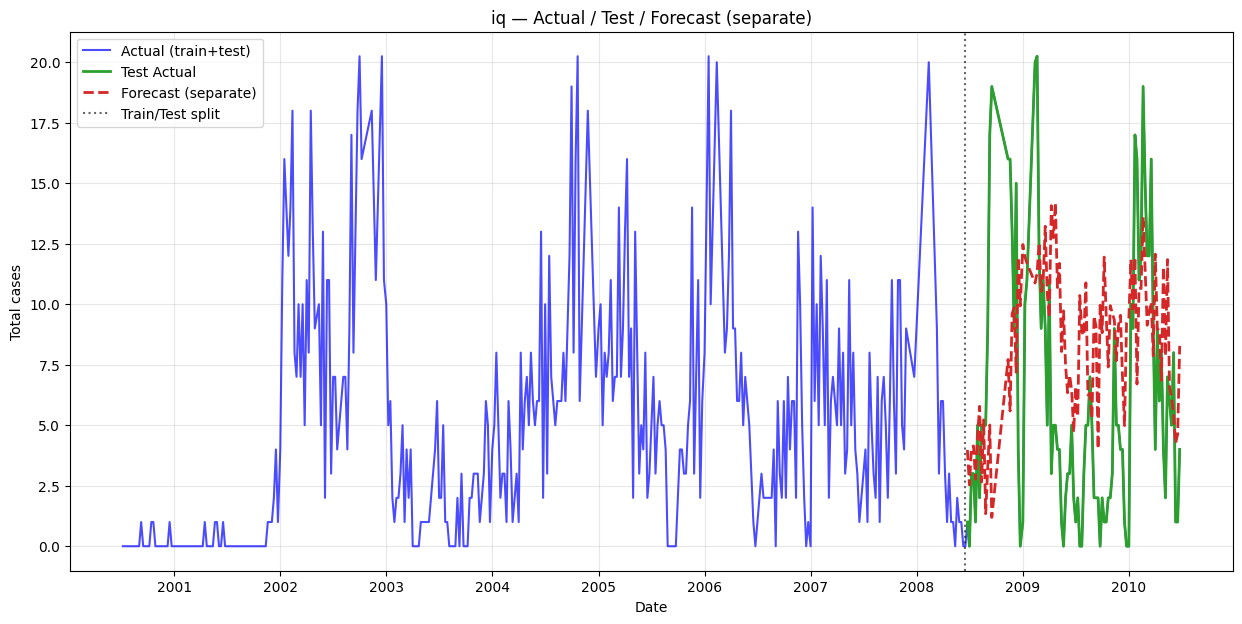


=== City: sj ===
Combined metrics: {'MSE': 232.73879083386635, 'RMSE': 15.25577893238711, 'MAE': 10.619632313417833, 'MAPE(%)': 5698396.325209846}
Separate metrics: {'MSE': 383.37468903643315, 'RMSE': 19.579956308338208, 'MAE': 15.689429561499246, 'MAPE(%)': 5360891.625368072}
Chosen model for city: combined


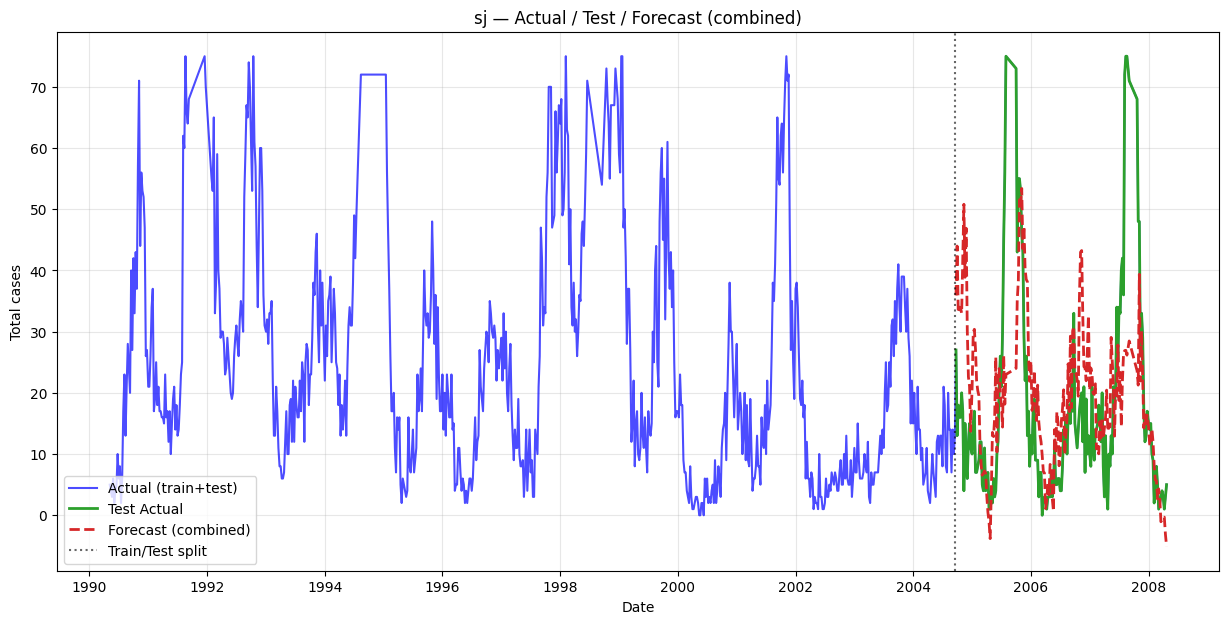


Summary metrics:


,city,chosen_model,combined_RMSE,separate_RMSE,chosen_RMSE,chosen_MAE,chosen_MAPE(%),chosen_MSE
0,iq,separate,6.142965,6.053428,6.053428,4.891444,7.372708e+07,36.643993
1,sj,combined,15.255779,19.579956,15.255779,10.619632,5.698396e+06,232.738791


In [117]:
results = {}
for city in sorted(df['city'].unique()):
    print("\n=== City:", city, "===")
    tr = train_df[train_df['city']==city].reset_index(drop=True)
    te = test_df[test_df['city']==city].reset_index(drop=True)

    # combined model forecast
    combined_res = autoregressive_forecast(combined_model, "combined", city, tr, te, scalers, target_stats, model_features, city2id)
    # separate model forecast
    model_sep = separate_models[city]
    sep_res = autoregressive_forecast(model_sep, "separate", city, tr, te, scalers, target_stats, model_features, {city:0})

    print("Combined metrics:", combined_res['metrics'])
    print("Separate metrics:", sep_res['metrics'])

    # choose best by RMSE
    if (not np.isnan(combined_res['metrics']['RMSE'])) and (combined_res['metrics']['RMSE'] <= sep_res['metrics']['RMSE']):
        chosen = ("combined", combined_res)
    else:
        chosen = ("separate", sep_res)

    print("Chosen model for city:", chosen[0])
    results[city] = {
        "combined": combined_res,
        "separate": sep_res,
        "chosen_model": chosen[0],
        "chosen_res": chosen[1]
    }

    # Plot: Actual all (train+test), Test Actual, Forecast (chosen)
    sim_df = chosen[1]['sim_df']
    plt.figure(figsize=(15,7))
    plt.plot(sim_df['week_start_date'], sim_df['total_cases'], label="Actual (train+test)", color='blue', alpha=0.7)
    # highlight test actual
    te_dates = te['week_start_date'].values
    plt.plot(te_dates, chosen[1]['y_true'], label="Test Actual", color='tab:green', linewidth=2)
    plt.plot(te_dates, chosen[1]['y_pred'], label=f"Forecast ({chosen[0]})", color='tab:red', linestyle='--', linewidth=2)
    # mark train/test split
    split_date = tr['week_start_date'].iloc[-1]
    plt.axvline(split_date, color='k', linestyle=':', alpha=0.6, label='Train/Test split')
    plt.title(f"{city} — Actual / Test / Forecast ({chosen[0]})")
    plt.xlabel("Date"); plt.ylabel("Total cases")
    plt.legend(); plt.grid(True, alpha=0.3); plt.show()

# Summary table of metrics
rows = []
for city, info in results.items():
    row = {
        "city": city,
        "chosen_model": info['chosen_model'],
        "combined_RMSE": info['combined']['metrics']['RMSE'],
        "separate_RMSE": info['separate']['metrics']['RMSE'],
        "chosen_RMSE": info['chosen_res']['metrics']['RMSE'],
        "chosen_MAE": info['chosen_res']['metrics']['MAE'],
        "chosen_MAPE(%)": info['chosen_res']['metrics']['MAPE(%)'],
        "chosen_MSE": info['chosen_res']['metrics']['MSE']
    }
    rows.append(row)
summary_df = pd.DataFrame(rows).sort_values('city').reset_index(drop=True)
print("\nSummary metrics:")
display(summary_df)


Cell 14 — Save per-city forecast CSVs and models (optional)

In [72]:
# os.makedirs("forecasts", exist_ok=True)
# for city, info in results.items():
#     chosen = info['chosen_res']
#     df_out = pd.DataFrame({
#         "week_start_date": pd.to_datetime(chosen['dates']),
#         "y_true": chosen['y_true'],
#         "y_pred": chosen['y_pred']
#     })
#     fn = f"forecasts/{city}_forecast.csv"
#     df_out.to_csv(fn, index=False)
#     print("Saved:", fn)

# # Save combined model weights (optional)
# torch.save(combined_model.state_dict(), "combined_model_llm4ts.pth")
# for city, model in separate_models.items():
#     torch.save(model.state_dict(), f"{city}_separate_model.pth")
# print("Models saved to disk.")
